Chapter 5
# 用指定色号和平面散点图可视化HSV色彩空间，均匀散点
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [2]:
# 导入包
import numpy as np
import colorsys
import matplotlib.pyplot as plt 
import math
import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 1. 定义函数用来绘制HSV色盘

In [3]:
def circle_points(num_r, num_n):
    r = np.linspace(0,1,num_r)
    # 极轴 [0, 1] 分成若干等份
    
    n = r*num_n
    # 每一层散点数 n 和半径成正比
    n = n.astype(int)
    # 将 n 转化为整数
    
    
    circles = np.empty((0,2))
    # 创建空数组
    
    # 用 for 循环产生每一层散点对应的极坐标
    for r_i, n_i in zip(r, n):
        
        t_i = np.linspace(0, 2*np.pi, n_i, endpoint=False)
        r_i = np.ones_like(t_i)*r_i
        
        circle_i = np.c_[r_i, t_i]
        circles = np.append(circles,circle_i, axis=0)
        # 拼接极坐标点
        
    return circles

def plot_HSV_even(value = 1, num_r = 21, num_n = 120):

    circles = circle_points(num_r, num_n)
    # 调用自定义函数
    
    RHO = circles[:,0]
    # 散点极角
    PHI = circles[:,1]
    # 散点极径

    h_ = (PHI-PHI.min()) / (PHI.max()-PHI.min()) 
    # 色调取值转换为 [0, 1] 区间

    s_ = RHO
    # 饱和度
    v_ = np.ones_like(RHO)*value
    # 明暗度为定值
    
    fig = plt.figure(figsize = (3,3))
    ax = fig.add_subplot(projection='polar')
    # 绘制极坐标

    h,s,v = h_.flatten().tolist(), s_.flatten().tolist(), v_.flatten().tolist()
    c = [colorsys.hsv_to_rgb(*x) for x in zip(h,s,v)]
    # colorsys.hsv_to_rgb() 完成 HSV 色号向 RGB 色号转换
    c = np.array(c)

    ax.scatter(PHI, RHO, c=c, s = 3, alpha = 1)
    # c 为散点颜色色号
    # s 为散点大小
    # alpha 为透明度；0 对应完全透明
    # ax.axis('off')
    ax.set_rlim(0,1)
    ax.set_xticks(np.linspace(0,  2*np.pi, 12, endpoint=False))
    ax.tick_params("both", grid_linewidth=0.5)
    ax.set_rlabel_position(0)
    ax.set_axisbelow(False)

    fig.savefig('Figures/HSV色盘_散点均匀_V_' + str(value) + '.svg', format='svg')
    plt.show()

### 2. 绘制HSV色盘，颗粒度高

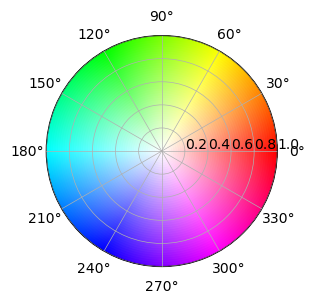

In [3]:
plot_HSV_even(value = 1, num_r = 51, num_n = 780)

### 3. 绘制HSV色盘，明暗度 Value = 1.0

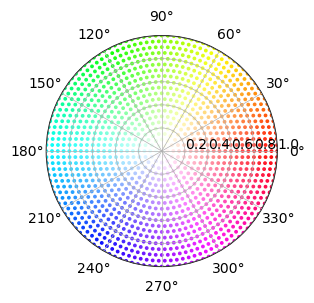

In [4]:
plot_HSV_even(value = 1)

### 4. 绘制HSV色盘，明暗度 Value = 0.8

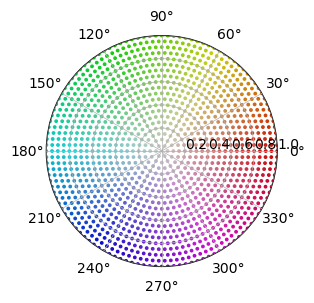

In [5]:
plot_HSV_even(value = 0.8)

### 5. 绘制HSV色盘，明暗度 Value = 0.6

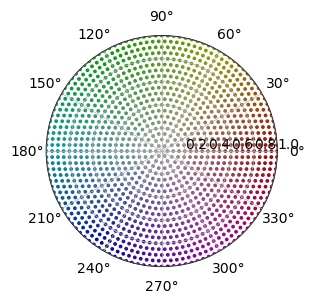

In [6]:
plot_HSV_even(value = 0.6)

### 6. 绘制HSV色盘，明暗度 Value = 0.4

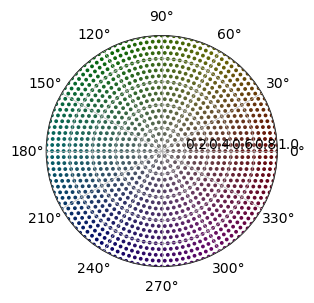

In [7]:
plot_HSV_even(value = 0.4)

### 7. 绘制HSV色盘，明暗度 Value = 0.2

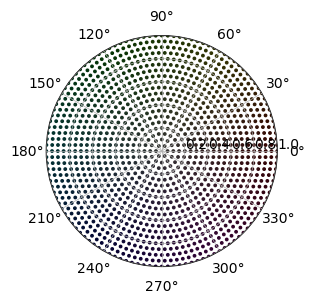

In [8]:
plot_HSV_even(value = 0.2)

### 8. 绘制HSV色盘，明暗度 Value = 0.0

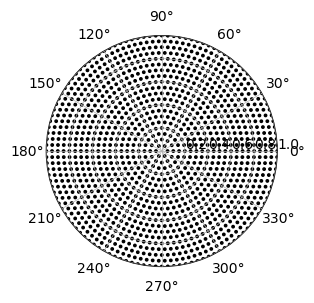

In [9]:
plot_HSV_even(value = 0)

In [10]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023